<a href="https://colab.research.google.com/github/ambcarvalho/challenge-TelecomX-parte1/blob/main/challenge_TelecomX_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

* Carregar os dados diretamente da `API` utilizando `Python`.

* Converter os dados para um `DataFrame` do `Pandas` para facilitar a manipulação.

In [ ]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
df = pd.json_normalize(response.json())
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

**Verificando e Tratando Inconsistências nos Dados**

Uma vez que os dados sejam carregados com sucesso, o próximo passo crucial é verificar a existência de inconsistências, como valores ausentes, duplicados, erros de formatação ou inconsistências nas categorias.

**Passos para verificação e tratamento:**

1. Valores ausentes:

Verificar a contagem de valores ausentes em cada coluna.
A coluna` Charges.Total` é um ponto de atenção, pois pode conter valores vazios ou não numéricos para clientes recém-chegados.

2. Conversão de Tipo de Dados:

* A coluna Charges.Total pode ser carregada como tipo `object (string)` devido a valores vazios ou espaços. Será necessário convertê-la para um tipo numérico, forçando erros para `NaN (Not a Number)`.
Preenchimento de Valores Ausentes:

* Após a conversão, qualquer NaN resultante em `Charges.Total` (provavelmente de clientes novos sem cobrança total ainda) deve ser preenchido com `0`.

3. Valores Duplicados:

Verificar e remover linhas duplicadas, se existirem, para garantir a unicidade dos registros.




In [ ]:
import numpy as np

print("--- Verificando Inconsistências nos Dados ---")

# 1. Verificando valores ausentes
print("\nContagem de valores ausentes por coluna antes do tratamento:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Verificando Inconsistências nos Dados ---

Contagem de valores ausentes por coluna antes do tratamento:
|                           | 0   |
|:--------------------------|:----|
| customerID                | 0   |
| Churn                     | 0   |
| customer.gender           | 0   |
| customer.SeniorCitizen    | 0   |
| customer.Partner          | 0   |
| customer.Dependents       | 0   |
| customer.tenure           | 0   |
| phone.PhoneService        | 0   |
| phone.MultipleLines       | 0   |
| internet.InternetService  | 0   |
| internet.OnlineSecurity   | 0   |
| internet.OnlineBackup     | 0   |
| internet.DeviceProtection | 0   |
| internet.TechSupport      | 0   |
| internet.StreamingTV      | 0   |
| internet.StreamingMovies  | 0   |
| account.Contract          | 0   |
| account.PaperlessBilling  | 0   |
| account.PaymentMethod     | 0   |
| account.Charges.Monthly   | 0   |
| account.Charges.Total     | 0   |


In [ ]:
# 2. Convertendo 'Charges.Total' para numérico, tratando erros
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [ ]:
# 3. Preenchendo valores ausentes em 'Charges.Total' com 0
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

print("\nContagem de valores ausentes por coluna após tratamento de 'Charges.Total':")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Contagem de valores ausentes por coluna após tratamento de 'Charges.Total':
|                           | 0   |
|:--------------------------|:----|
| customerID                | 0   |
| Churn                     | 0   |
| customer.gender           | 0   |
| customer.SeniorCitizen    | 0   |
| customer.Partner          | 0   |
| customer.Dependents       | 0   |
| customer.tenure           | 0   |
| phone.PhoneService        | 0   |
| phone.MultipleLines       | 0   |
| internet.InternetService  | 0   |
| internet.OnlineSecurity   | 0   |
| internet.OnlineBackup     | 0   |
| internet.DeviceProtection | 0   |
| internet.TechSupport      | 0   |
| internet.StreamingTV      | 0   |
| internet.StreamingMovies  | 0   |
| account.Contract          | 0   |
| account.PaperlessBilling  | 0   |
| account.PaymentMethod     | 0   |
| account.Charges.Monthly   | 0   |
| account.Charges.Total     | 0   |


In [ ]:
# 4. Verificando e removendo linhas duplicadas
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"\nNúmero de linhas duplicadas encontradas: {num_duplicates}")
    df.drop_duplicates(inplace=True)
    print(f"Linhas duplicadas removidas. Novo número de linhas: {len(df)}")
else:
    print("\nNenhuma linha duplicada encontrada.")


Nenhuma linha duplicada encontrada.


In [ ]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
# Exibindo os tipos de dados após o tratamento para confirmar a conversão de 'Charges.Total'
print("\nInformações do DataFrame após tratamento de inconsistências:")
df.info()


Informações do DataFrame após tratamento de inconsistências:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null  

**Criando a Coluna "`Contas_Diarias`"**

Com os dados limpos, o próximo passo é criar uma nova coluna chamada `Contas_Diarias`, que representará o faturamento diário do cliente, calculado a partir do `Charges.Monthly.`

In [ ]:
df['Contas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


**Padronização e Transformação de Dados (Opcional, mas Recomendado)**

Esta etapa visa tornar os dados mais consistentes e adequados para análise, especialmente para modelos matemáticos. Isso inclui a conversão de valores textuais como `"Yes" e "No"` para binários `(1 e 0)`, e a tradução ou renomeação de colunas para maior clareza.

In [ ]:
# Mapear 'Yes'/'No' para 1/0 para colunas relevantes
binary_map = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['customer.Partner'] = df['customer.Partner'].map(binary_map)
df['customer.Dependents'] = df['customer.Dependents'].map(binary_map)
df['phone.PhoneService'] = df['phone.PhoneService'].map(binary_map)
df['phone.MultipleLines'] = df['phone.MultipleLines'].map(binary_map)
df['internet.OnlineSecurity'] = df['internet.OnlineSecurity'].map(binary_map)
df['internet.OnlineBackup'] = df['internet.OnlineBackup'].map(binary_map)
df['internet.DeviceProtection'] = df['internet.DeviceProtection'].map(binary_map)
df['internet.TechSupport'] = df['internet.TechSupport'].map(binary_map)
df['internet.StreamingTV'] = df['internet.StreamingTV'].map(binary_map)
df['internet.StreamingMovies'] = df['internet.StreamingMovies'].map(binary_map)
df['account.PaperlessBilling'] = df['account.PaperlessBilling'].map(binary_map)

df['customer.gender'] = df['customer.gender'].map({'Male': 1, 'Female': 0})

**Renomear os nomes das colunas para Português**

In [ ]:
df.rename(columns={
    'account.Charges.Monthly': 'Taxas_mensais',
    'account.Charges.Total': 'Cobranca_total',
    'customerID': 'Id_cliente',
    'customer.gender': 'Sexo',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Tempo_servico',
    'phone.PhoneService': 'Servico_telefone',
    'phone.MultipleLines': 'Varias_linhas',
    'internet.InternetService': 'Servico_internet',
    'internet.OnlineSecurity': 'Seguranca_online',
    'internet.OnlineBackup': 'Backup_online',
    'internet.DeviceProtection': 'Protecao_dispositivo',
    'internet.TechSupport': 'Suporte_tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_filmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Fatura_papel',
    'account.PaymentMethod': 'Metodo_pagamento',
    'Contas_Diarias': 'Contas_diarias'
}, inplace=True)

In [ ]:
print("\nPrimeiras 5 linhas do DataFrame após padronização e renomeação:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nTipos de dados após padronização:")
df.info()


Primeiras 5 linhas do DataFrame após padronização e renomeação:
| Id_cliente   | Churn   | Sexo   | Idoso   | Parceiro   | Dependentes   | Tempo_servico   | Servico_telefone   | Varias_linhas   | Servico_internet   | Seguranca_online   | Backup_online   | Protecao_dispositivo   | Suporte_tecnico   | Streaming_TV   | Streaming_filmes   | Contrato       | Fatura_papel   | Metodo_pagamento   | Taxas_mensais   | Cobranca_total   | Contas_diarias   |
|:-------------|:--------|:-------|:--------|:-----------|:--------------|:----------------|:-------------------|:----------------|:-------------------|:-------------------|:----------------|:-----------------------|:------------------|:---------------|:-------------------|:---------------|:---------------|:-------------------|:----------------|:-----------------|:-----------------|
| 0002-ORFBO   | 0       | 0      | 0       | 1          | 1             | 9               | 1                  | 0               | DSL                | 0         

#📊 Carga e análise

**Análise Descritiva**

Vamos realizar uma análise descritiva das **variáveis numéricas** para entender a distribuição dos dados. Isso nos ajudará a identificar padrões gerais no comportamento dos clientes.

In [ ]:
print("\n--- Análise Descritiva ---")
df.describe()


--- Análise Descritiva ---


,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Seguranca_online,Backup_online,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Fatura_papel,Taxas_mensais,Cobranca_total,Contas_diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


**Distribuição da Evasão (`Churn`)**

Vamos visualizar a distribuição da variável `"Churn"` para entender quantos clientes estão saindo da empresa.


--- Distribuição da Evasão (Churn) ---

Contagem de Churn (0: Não Evadiu, 1: Evadiu):
| Churn   | count   |
|:--------|:--------|
| 0       | 5174    |
| 1       | 1869    |

Percentual de Churn:
| Churn   | proportion   |
|:--------|:-------------|
| 0.00    | 73.46        |
| 1.00    | 26.54        |




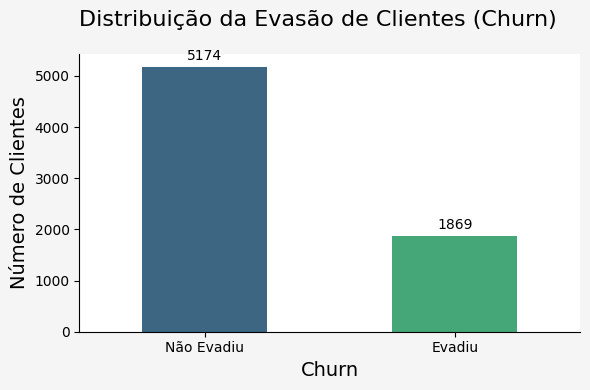

In [ ]:
print("\n--- Distribuição da Evasão (Churn) ---")
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("\nContagem de Churn (0: Não Evadiu, 1: Evadiu):")
print(churn_counts.to_markdown(numalign="left", stralign="left"))

print("\nPercentual de Churn:")
print(churn_percentage.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))
print("\n")

# Contagem de clientes que saíram ou não
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#FFFFFF')
sns.countplot(x='Churn', data=df, width=0.5, hue='Churn', palette='viridis', legend=False, ax=ax)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribuição da Evasão de Clientes (Churn)', loc='left', fontsize=16, pad=20)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.tight_layout()
plt.show()

In [ ]:
!pip install --upgrade matplotlib

**Contagem de Evasão por Variáveis Categóricas**

Agora, vamos explorar como a **evasão** se distribui de acordo com **variáveis categóricas**, como `gênero, tipo de contrato, método de pagamento`, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.


Churn por Sexo (Percentual):
| Sexo   | 0.0   | 1.0   |
|:-------|:------|:------|
| 0      | 73.08 | 26.92 |
| 1      | 73.84 | 26.16 |




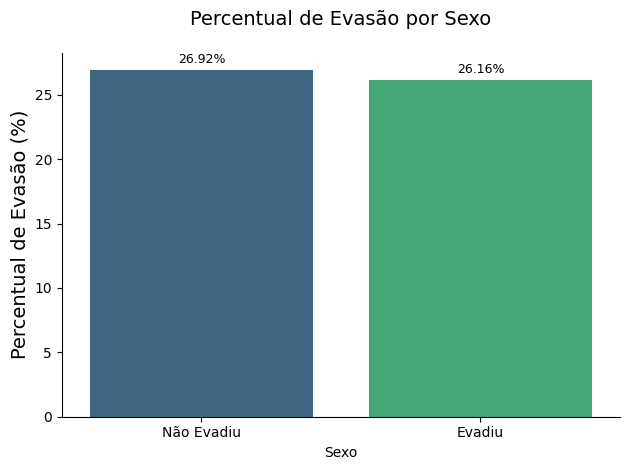


Churn por Idoso (Percentual):
| Idoso   | 0.0   | 1.0   |
|:--------|:------|:------|
| 0       | 76.39 | 23.61 |
| 1       | 58.32 | 41.68 |




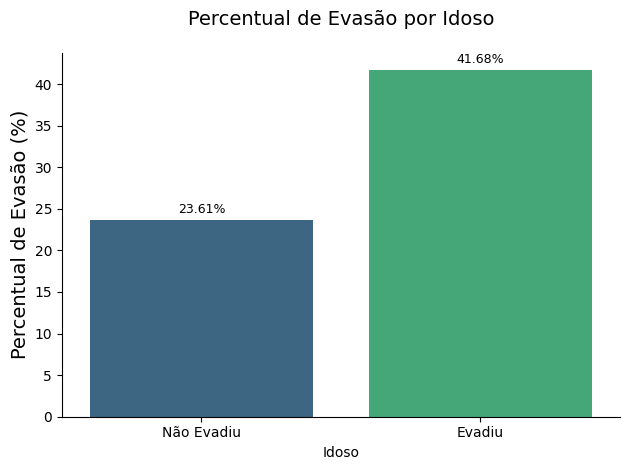


Churn por Parceiro (Percentual):
| Parceiro   | 0.0   | 1.0   |
|:-----------|:------|:------|
| 0          | 67.04 | 32.96 |
| 1          | 80.34 | 19.66 |




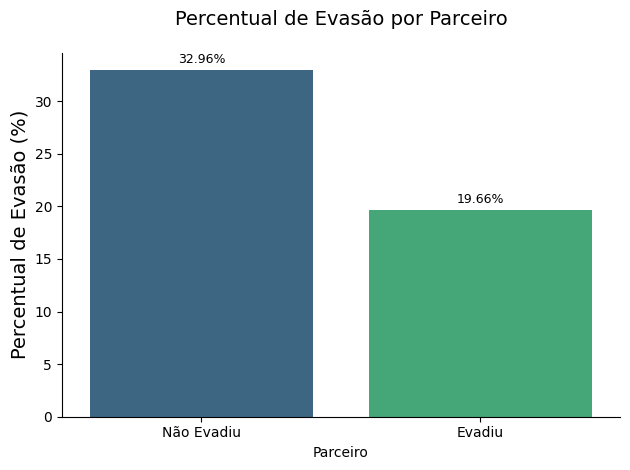


Churn por Dependentes (Percentual):
| Dependentes   | 0.0   | 1.0   |
|:--------------|:------|:------|
| 0             | 68.72 | 31.28 |
| 1             | 84.55 | 15.45 |




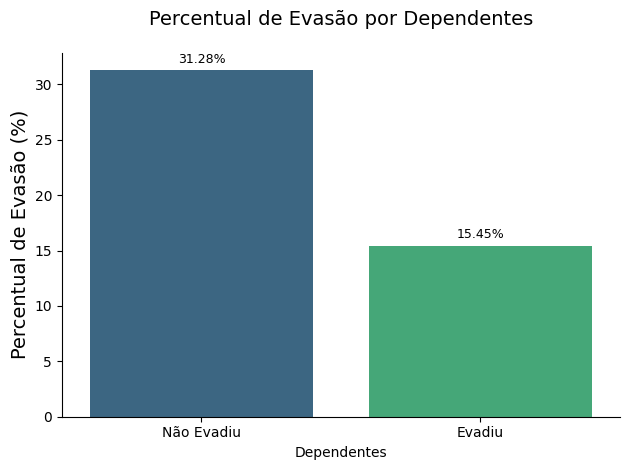


Churn por Servico_telefone (Percentual):
| Servico_telefone   | 0.0   | 1.0   |
|:-------------------|:------|:------|
| 0                  | 75.07 | 24.93 |
| 1                  | 73.29 | 26.71 |




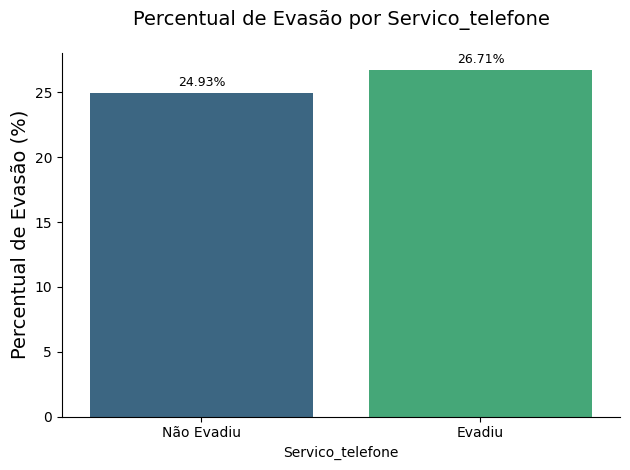


Churn por Varias_linhas (Percentual):
| Varias_linhas   | 0.0   | 1.0   |
|:----------------|:------|:------|
| 0               | 74.98 | 25.02 |
| 1               | 71.39 | 28.61 |




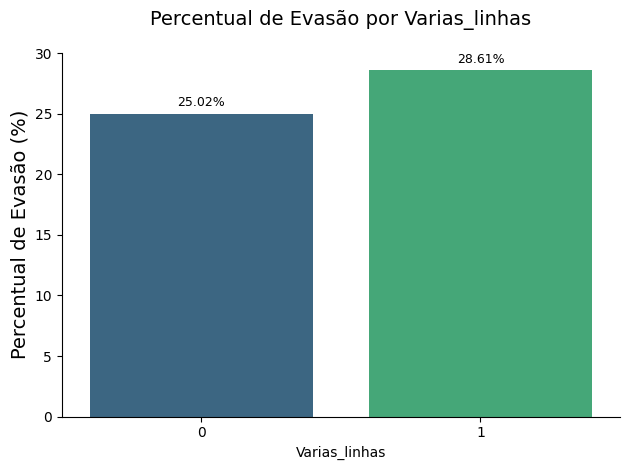


Churn por Servico_internet (Percentual):
| Servico_internet   | 0.0   | 1.0   |
|:-------------------|:------|:------|
| DSL                | 81.04 | 18.96 |
| Fiber optic        | 58.11 | 41.89 |
| No                 | 92.60 | 7.40  |




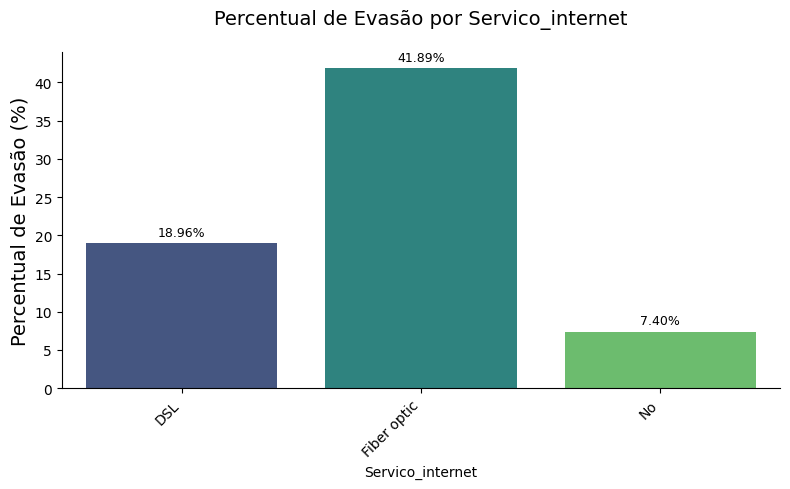


Churn por Seguranca_online (Percentual):
| Seguranca_online   | 0.0   | 1.0   |
|:-------------------|:------|:------|
| 0                  | 68.67 | 31.33 |
| 1                  | 85.39 | 14.61 |




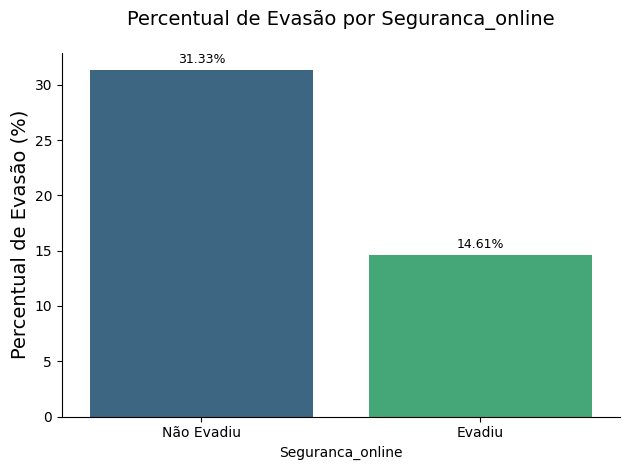


Churn por Backup_online (Percentual):
| Backup_online   | 0.0   | 1.0   |
|:----------------|:------|:------|
| 0               | 70.83 | 29.17 |
| 1               | 78.47 | 21.53 |




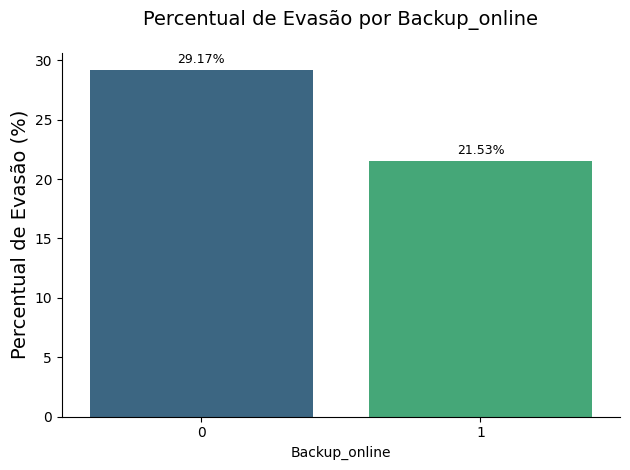


Churn por Protecao_dispositivo (Percentual):
| Protecao_dispositivo   | 0.0   | 1.0   |
|:-----------------------|:------|:------|
| 0                      | 71.35 | 28.65 |
| 1                      | 77.50 | 22.50 |




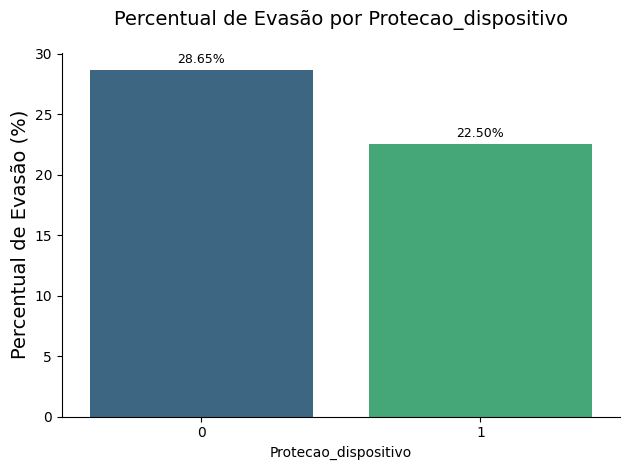


Churn por Suporte_tecnico (Percentual):
| Suporte_tecnico   | 0.0   | 1.0   |
|:------------------|:------|:------|
| 0                 | 68.81 | 31.19 |
| 1                 | 84.83 | 15.17 |




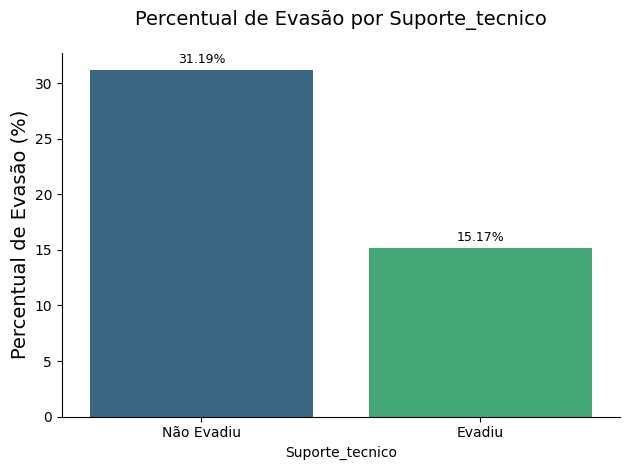


Churn por Streaming_TV (Percentual):
| Streaming_TV   | 0.0   | 1.0   |
|:---------------|:------|:------|
| 0              | 75.67 | 24.33 |
| 1              | 69.93 | 30.07 |




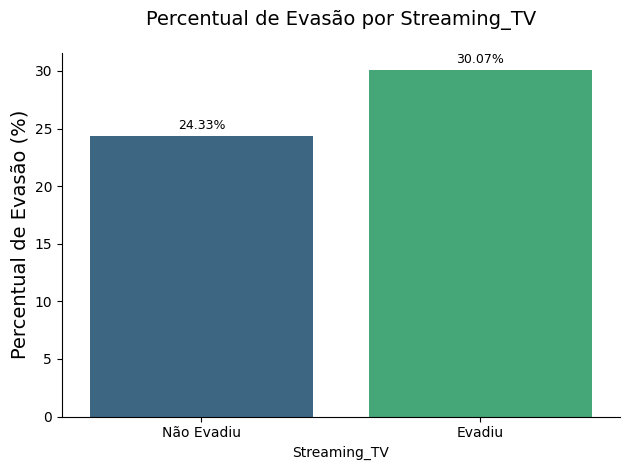


Churn por Streaming_filmes (Percentual):
| Streaming_filmes   | 0.0   | 1.0   |
|:-------------------|:------|:------|
| 0                  | 75.62 | 24.38 |
| 1                  | 70.06 | 29.94 |




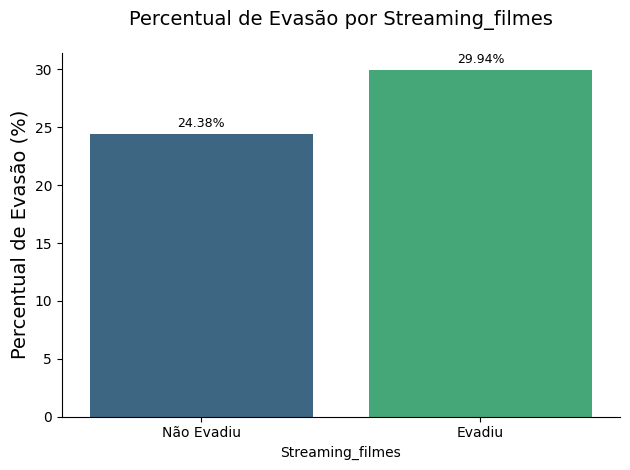


Churn por Contrato (Percentual):
| Contrato       | 0.0   | 1.0   |
|:---------------|:------|:------|
| Month-to-month | 57.29 | 42.71 |
| One year       | 88.73 | 11.27 |
| Two year       | 97.17 | 2.83  |




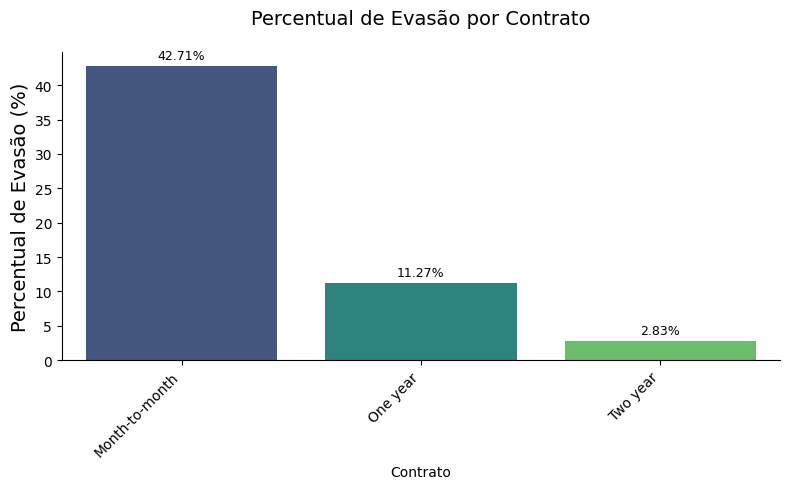


Churn por Fatura_papel (Percentual):
| Fatura_papel   | 0.0   | 1.0   |
|:---------------|:------|:------|
| 0              | 83.67 | 16.33 |
| 1              | 66.43 | 33.57 |




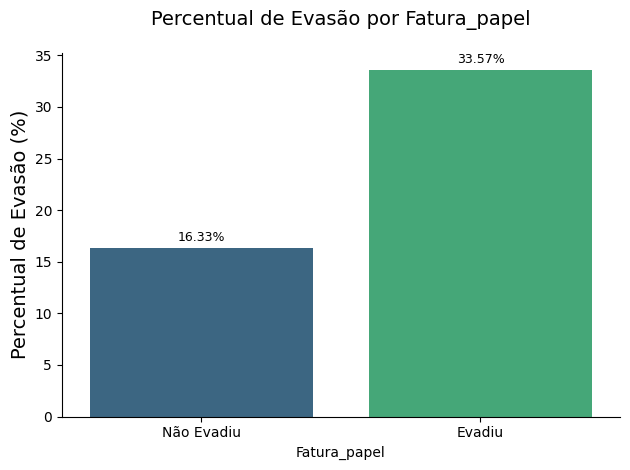


Churn por Metodo_pagamento (Percentual):
| Metodo_pagamento          | 0.0   | 1.0   |
|:--------------------------|:------|:------|
| Bank transfer (automatic) | 83.29 | 16.71 |
| Credit card (automatic)   | 84.76 | 15.24 |
| Electronic check          | 54.71 | 45.29 |
| Mailed check              | 80.89 | 19.11 |




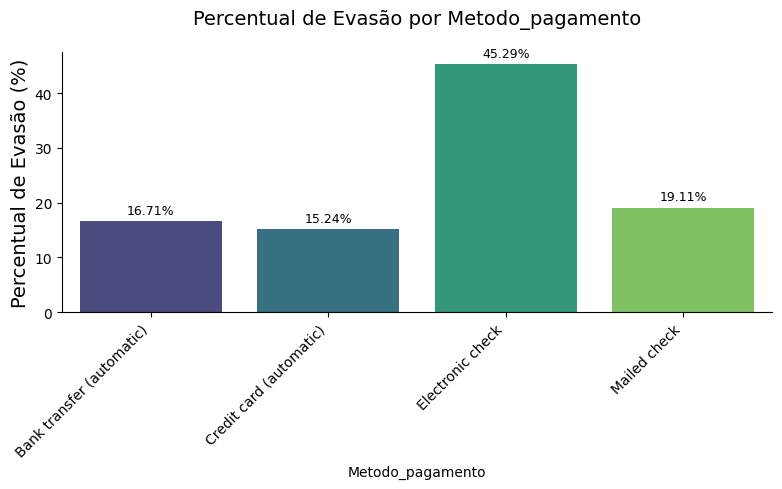

In [ ]:
categorical_cols_for_churn = [
        'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Servico_telefone',
        'Varias_linhas', 'Servico_internet', 'Seguranca_online', 'Backup_online',
        'Protecao_dispositivo', 'Suporte_tecnico', 'Streaming_TV', 'Streaming_filmes',
        'Contrato', 'Fatura_papel', 'Metodo_pagamento'
    ]

for col in categorical_cols_for_churn:
    if df[col].dtype == 'object': #Para colunas que ainda são object (Servico_internet, Contrato, Metodo_pagamento)
            churn_by_category = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
            print(f"\nChurn por {col} (Percentual):")
            print(churn_by_category.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))
            print("\n")

            plt.figure(figsize=(8, 5))
            custom_palette_obj = sns.color_palette("viridis", n_colors=len(churn_by_category.index))
            ax = sns.barplot(x=churn_by_category.index, y=churn_by_category[1], hue=churn_by_category.index, palette=custom_palette_obj, legend=False)

            for container in ax.containers:
                ax.bar_label(container, fmt='%.2f%%', fontsize=9, padding=3)

            plt.title(f'Percentual de Evasão por {col}', fontsize=14, pad=20)
            plt.xlabel(col)
            plt.ylabel('Percentual de Evasão (%)', fontsize=14)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            sns.despine()
            plt.show()

    else: # Para colunas que foram convertidas para binário (0/1)
            churn_by_category = df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100
            print(f"\nChurn por {col} (Percentual):")
            print(churn_by_category.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))
            print("\n")

            custom_palette_obj = sns.color_palette("viridis", n_colors=len(churn_by_category.index))
            ax = sns.barplot(x=churn_by_category.index, y=churn_by_category[1], hue=churn_by_category.index, palette=custom_palette_obj, legend=False)

        # Adicionando os valores nas barras
            for container in ax.containers:
                ax.bar_label(container, fmt='%.2f%%', fontsize=9, padding=3)

            plt.title(f'Percentual de Evasão por {col}', fontsize=14, pad=20)
            plt.xlabel(col)
            plt.ylabel('Percentual de Evasão (%)', fontsize=14)
            plt.xticks(ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'] if col in ['Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Servico_telefone', 'Várias_linhas', 'OnlineSecurity', 'OnlineBackup', 'Seguranca_online', 'Suporte_tecnico', 'Streaming_TV', 'Streaming_filmes', 'Fatura_papel'] else [str(x) for x in churn_by_category.index])
            plt.tight_layout()
            sns.despine()
            plt.show()

**Contagem de Evasão por Variáveis Numéricas**

 **Variáveis numéricas**, como **"`Cobranca_total`"** ou **"`Tempo_servico`"**, se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

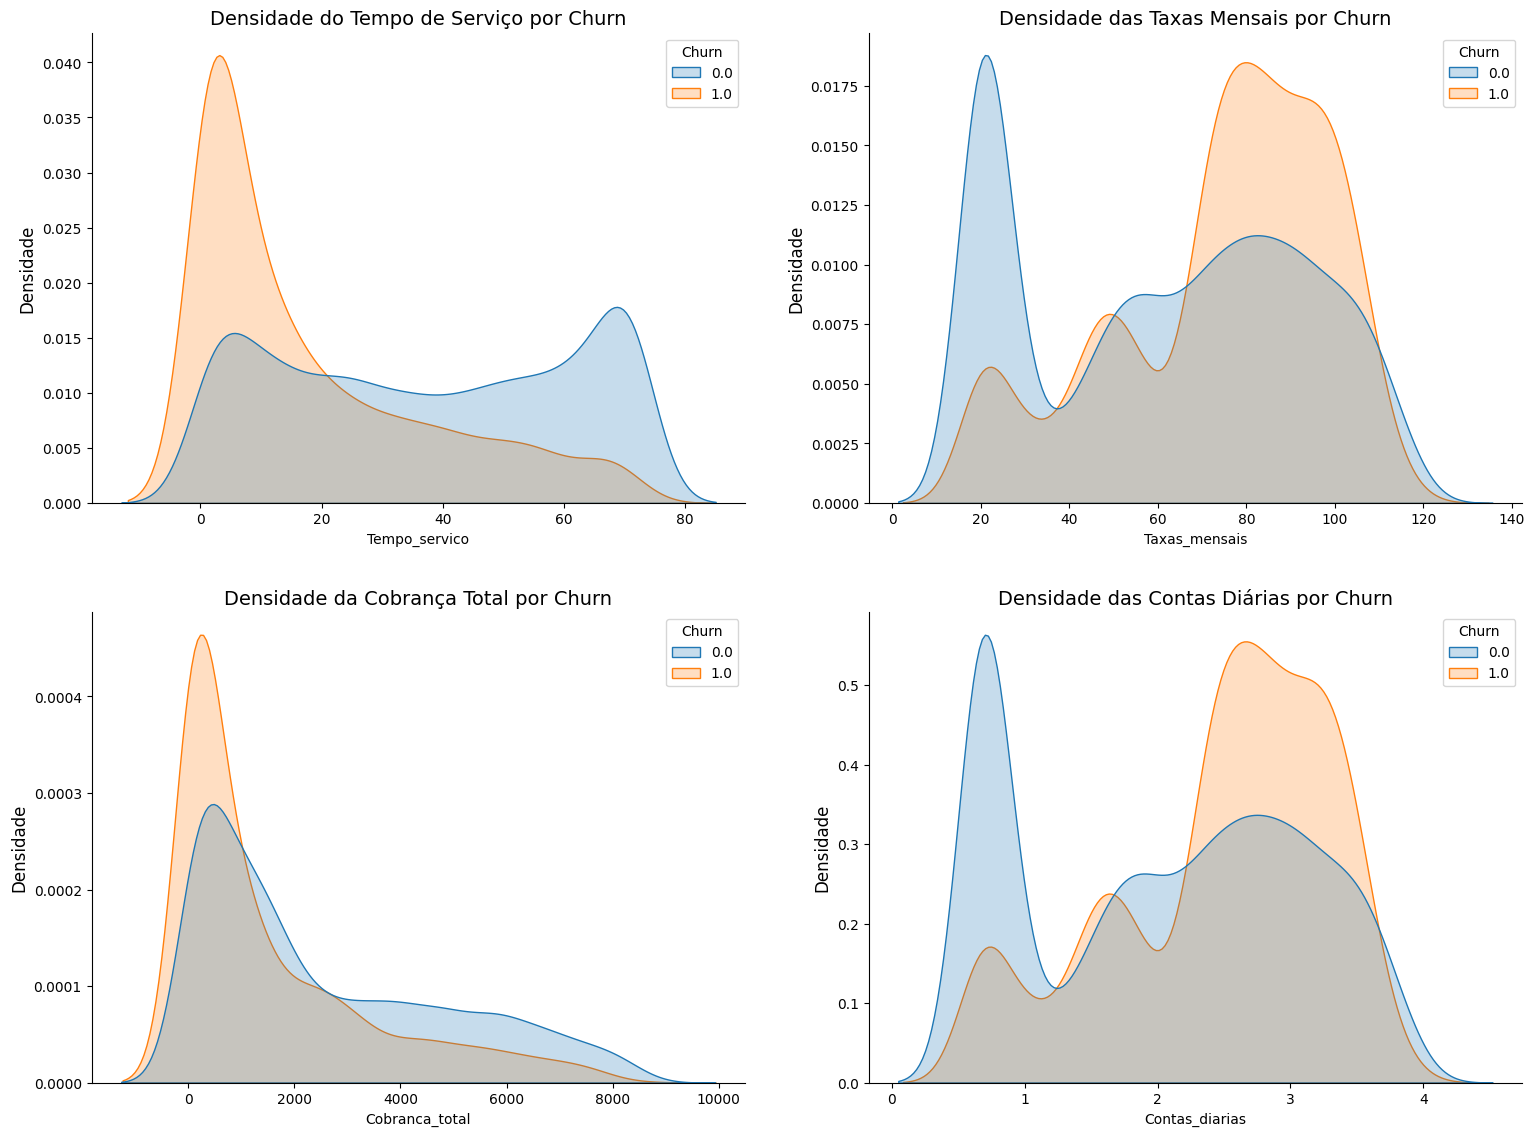

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Tempo_servico
sns.kdeplot(data=df, x='Tempo_servico', hue='Churn', fill=True, common_norm=False, ax=axes[0, 0])
sns.despine(ax=axes[0, 0])
axes[0, 0].set_title('Densidade do Tempo de Serviço por Churn', fontsize=14)
axes[0, 0].set_ylabel('Densidade', fontsize=12)

# Taxas_mensais
sns.kdeplot(data=df, x='Taxas_mensais', hue='Churn', fill=True, common_norm=False, ax=axes[0, 1])
sns.despine(ax=axes[0, 1])
axes[0, 1].set_title('Densidade das Taxas Mensais por Churn', fontsize=14)
axes[0, 1].set_ylabel('Densidade', fontsize=12)

# Cobranca_total
sns.kdeplot(data=df, x='Cobranca_total', hue='Churn', fill=True, common_norm=False, ax=axes[1, 0])
sns.despine(ax=axes[1, 0])
axes[1, 0].set_title('Densidade da Cobrança Total por Churn', fontsize=14)
axes[1, 0].set_ylabel('Densidade', fontsize=12)

# Contas_diarias
sns.kdeplot(data=df, x='Contas_diarias', hue='Churn', fill=True, common_norm=False, ax=axes[1, 1])
sns.despine(ax=axes[1, 1])
axes[1, 1].set_title('Densidade das Contas Diárias por Churn', fontsize=14 )
axes[1, 1].set_ylabel('Densidade', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

**EXTRA: Análise de Correlação entre Variáveis**

Para a análise de correlação, precisamos garantir que todas as colunas relevantes sejam numéricas.

As colunas` 'Servico_internet', 'Contrato', 'PaymentMethod'` ainda são categóricas `(object)`.

In [ ]:
# convertê-las usando One-Hot Encoding para a correlação.
df_encoded = pd.get_dummies(df, columns=['Servico_internet', 'Contrato', 'Metodo_pagamento'], drop_first=True)

# Remover CustomerID, pois não é relevante para correlação
df_encoded = df_encoded.drop('Id_cliente', axis=1)

# Criar a coluna 'Numero_servicos' para a análise de correlação
# Contar o número de serviços adicionais que o cliente possui
service_cols = [
        'Servico_telefone', 'Varias_linhas', 'Seguranca_online', 'Backup_online',
        'Protecao_dispositivo', 'Suporte_tecnico', 'Streaming_TV', 'Streaming_filmes'
    ]
# Certificar-se de que as colunas de serviço são numéricas (0 ou 1)
for col in service_cols:
        if col in df_encoded.columns and df_encoded[col].dtype == 'object':
            df_encoded[col] = df_encoded[col].map(binary_map) # Re-mapear se necessário

# Somar os serviços, tratando NaN como 0 se houver
df_encoded['Numero_servicos'] = df_encoded[service_cols].sum(axis=1)


Correlação da variável 'Churn' com outras variáveis (top 10):
|                                   | Churn   |
|:----------------------------------|:--------|
| Churn                             | 1.00    |
| Servico_internet_Fiber optic      | 0.31    |
| Metodo_pagamento_Electronic check | 0.30    |
| Contas_diarias                    | 0.19    |
| Taxas_mensais                     | 0.19    |
| Fatura_papel                      | 0.19    |
| Idoso                             | 0.15    |
| Streaming_TV                      | 0.06    |
| Streaming_filmes                  | 0.06    |
| Varias_linhas                     | 0.04    |

Correlação da variável 'Churn' com outras variáveis (bottom 10):
|                                          | Churn   |
|:-----------------------------------------|:--------|
| Metodo_pagamento_Credit card (automatic) | -0.13   |
| Parceiro                                 | -0.15   |
| Dependentes                              | -0.16   |
| Suporte_tecnico   

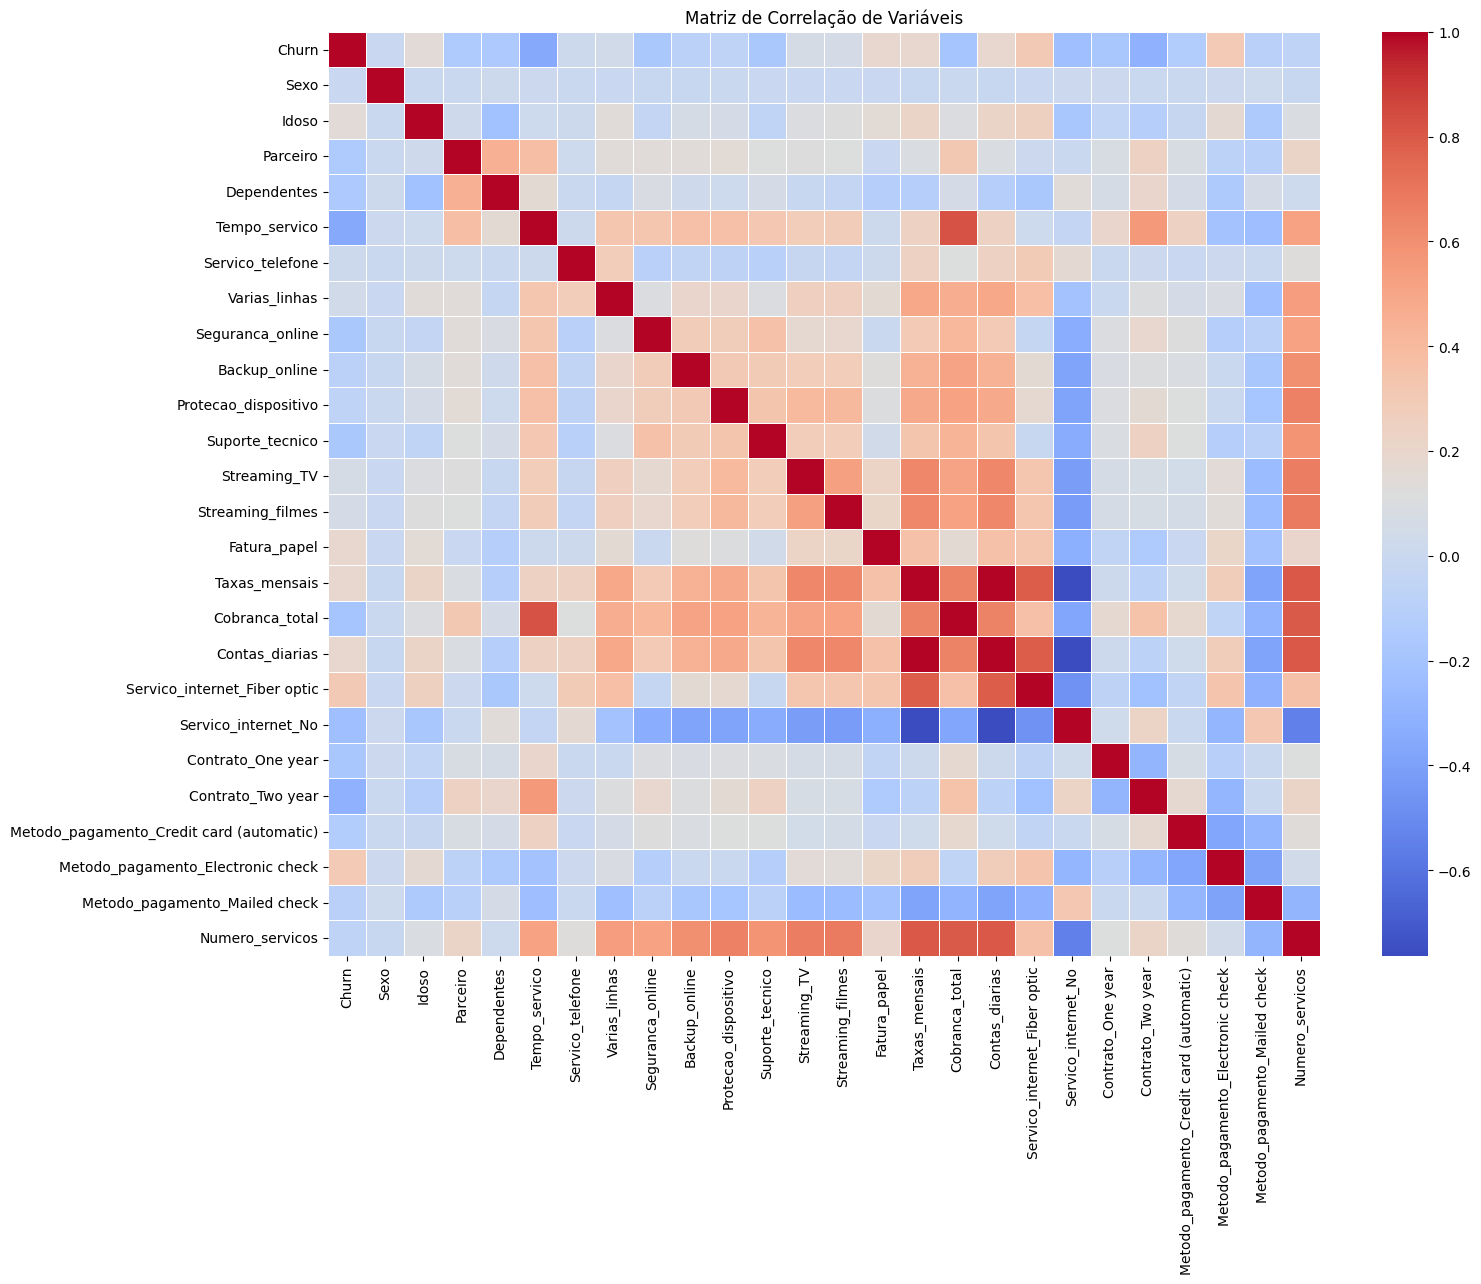

In [ ]:
    # Calcular a matriz de correlação
    correlation_matrix = df_encoded.corr()

    # Correlação da variável 'Churn' com outras variáveis
    churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
    print("\nCorrelação da variável 'Churn' com outras variáveis (top 10):")
    print(churn_correlation.head(10).to_markdown(floatfmt=".2f", numalign="left", stralign="left"))

    print("\nCorrelação da variável 'Churn' com outras variáveis (bottom 10):")
    print(churn_correlation.tail(10).to_markdown(floatfmt=".2f", numalign="left", stralign="left"))

    # Visualizar a matriz de correlação (heatmap)
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação de Variáveis')
    plt.show()


Percentual de Churn por Número de Serviços Contratados:
| Numero_servicos   | Churn   |
|:------------------|:--------|
| 0                 | 43.75   |
| 1                 | 21.11   |
| 2                 | 32.83   |
| 3                 | 36.48   |
| 4                 | 31.34   |
| 5                 | 25.55   |
| 6                 | 22.49   |
| 7                 | 12.41   |
| 8                 | 5.29    |


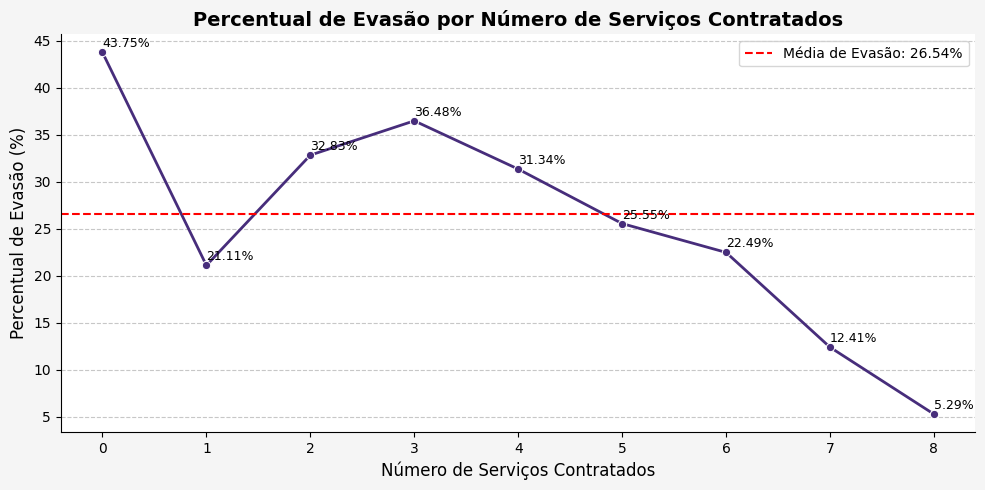

In [ ]:
# Calcula o percentual de Churn por número de serviços
churn_by_services = df_encoded.groupby('Numero_servicos')['Churn'].mean() * 100

print("\nPercentual de Churn por Número de Serviços Contratados:")
print(churn_by_services.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))

fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#FFFFFF')
sns.lineplot(x=churn_by_services.index, y=churn_by_services.values,
             marker="o", color="#472D7BFF", linewidth=2, ax=ax)

for x, y in zip(churn_by_services.index, churn_by_services.values):
    ax.text(x, y + 0.9, f'{y:.2f}%', ha='left', va='center', fontsize=9, color='#000000')

overall_churn_mean = df_encoded['Churn'].mean() * 100
ax.axhline(y=overall_churn_mean, color='red', linestyle='--', label=f'Média de Evasão: {overall_churn_mean:.2f}%')
ax.set_title('Percentual de Evasão por Número de Serviços Contratados', fontsize=14, fontweight='bold')
ax.set_xlabel('Número de Serviços Contratados', fontsize=12)
ax.set_ylabel('Percentual de Evasão (%)', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=10)
ax.set_xticks(churn_by_services.index)
sns.despine()
plt.tight_layout()
plt.show()


Estatísticas Não Evadiu
count    5174.000000
mean        2.042080
std         1.036492
min         0.610000
25%         0.840000
50%         2.150000
75%         2.950000
max         3.960000
Name: Contas_diarias, dtype: float64



Estatísticas Evadiu
count    1869.000000
mean        2.481450
std         0.822287
min         0.630000
25%         1.870000
50%         2.660000
75%         3.140000
max         3.940000
Name: Contas_diarias, dtype: float64




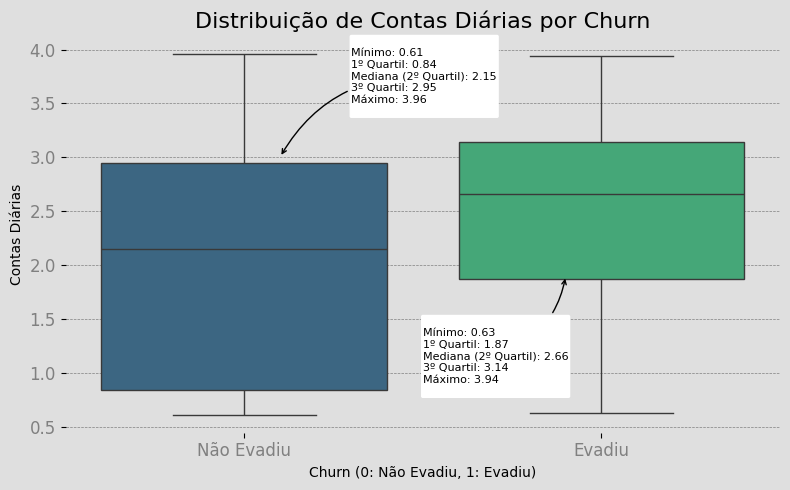

In [ ]:
AZUL_1 = '#1f77b4'
BRANCO = 'white'
CINZA_3 = '#808080'
PRETO = 'black'
CINZA_1 = '#dfdfdf'

plt.figure(figsize=(8, 5), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
custom_palette_binary = sns.color_palette("viridis", n_colors=2)
ax = sns.boxplot(x='Churn', y='Contas_diarias', data=df_encoded, hue='Churn', palette=custom_palette_binary, legend=False)

plt.title('Distribuição de Contas Diárias por Churn', fontsize=16 )
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Contas Diárias')
plt.xticks(fontsize=12, color=CINZA_3, ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.yticks(fontsize=12, color=CINZA_3)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Análise Descritiva ---
stats_churn_0 = df_encoded[df_encoded['Churn'] == 0]['Contas_diarias'].describe()
stats_churn_1 = df_encoded[df_encoded['Churn'] == 1]['Contas_diarias'].describe()

print("\nEstatísticas Não Evadiu")
print (stats_churn_0)
print("\n")

print("\nEstatísticas Evadiu")
print (stats_churn_1)
print("\n")

texto_anotacao_nao_evadiu = f"""
Mínimo: {stats_churn_0['min']:.2f}
1º Quartil: {stats_churn_0['25%']:.2f}
Mediana (2º Quartil): {stats_churn_0['50%']:.2f}
3º Quartil: {stats_churn_0['75%']:.2f}
Máximo: {stats_churn_0['max']:.2f}
"""

texto_anotacao_evadiu = f"""
Mínimo: {stats_churn_1['min']:.2f}
1º Quartil: {stats_churn_1['25%']:.2f}
Mediana (2º Quartil): {stats_churn_1['50%']:.2f}
3º Quartil: {stats_churn_1['75%']:.2f}
Máximo: {stats_churn_1['max']:.2f}
"""

ax.annotate(texto_anotacao_nao_evadiu, xy=(0.1, 3.0), xytext=(0.3, 3.4), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate(texto_anotacao_evadiu, xy=(0.9, 1.9), xytext=(0.5, 0.8), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("dados_tratados.csv", index=False)

#📄Relatório de Análise de Evasão de Clientes (Churn)

### Introdução

O objetivo desta análise é identificar e compreender os fatores que levam os clientes da empresa de telecomunicações TelecomX a **evadir `(Churn)`**, ou seja, a cancelar seus serviços. A evasão de clientes é um problema crítico para qualquer negócio, pois impacta diretamente a receita e o crescimento. Ao entender as causas por trás da evasão, a TelecomX pode desenvolver estratégias eficazes para reter seus clientes, melhorar a satisfação e, consequentemente, aumentar a lucratividade.

Este relatório detalha as etapas da análise, desde a limpeza e tratamento dos dados até a identificação de padrões por meio de análises exploratórias, culminando em conclusões e recomendações práticas para mitigar o problema da evasão.

---

### Desenvolvimento:

**Limpeza e Tratamento de Dados**

A etapa inicial consistiu na importação e preparação dos dados para análise. Os passos realizados foram:

1.  **Importação dos Dados**: Os dados foram carregados a partir de um arquivo JSON disponível em um repositório `GitHub`, utilizando as bibliotecas `requests` e `pandas`.
2.  **Verificação de Valores Ausentes**: Inicialmente, foi identificada a presença de valores ausentes na coluna `'account.Charges.Total (Cobranca_total)'`.

    ```
    Contagem de valores ausentes por coluna antes do tratamento:
    | Coluna                | Valores Ausentes |
    |:----------------------|:-----------------|
    | customerID            | 0                |
    | customer.gender       | 0                |
    | customer.SeniorCitizen| 0                |
    | customer.Partner      | 0                |
    | customer.Dependents   | 0                |
    | customer.tenure       | 0                |
    | phone.PhoneService    | 0                |
    | phone.MultipleLines   | 0                |
    | internet.InternetService| 0              |
    | internet.OnlineSecurity| 0               |
    | internet.OnlineBackup | 0                |
    | internet.DeviceProtection| 0             |
    | internet.TechSupport  | 0                |
    | internet.StreamingTV  | 0                |
    | internet.StreamingMovies| 0              |
    | account.Contract      | 0                |
    | account.PaperlessBilling| 0              |
    | account.PaymentMethod | 0                |
    | account.Charges.Monthly| 0               |
    | account.Charges.Total | 11               |
    | Churn                 | 0                |
    ```

3.  **Conversão e Preenchimento de 'account.Charges.Total'**: A coluna `'account.Charges.Total (Cobranca_total)'` foi convertida para tipo numérico, e os valores não numéricos (incluindo strings vazias que resultam em `NaN` após a coerção) foram preenchidos com `0`. Essa abordagem é justificada pela observação de que clientes com `'customer.tenure (tempo de serviço)'` igual a zero e `'account.Charges.Total (Cobranca_total)'` nulo indicam clientes recém-adquiridos sem cobranças totais ainda.

    ```
    Contagem de valores ausentes por coluna após tratamento de 'Charges.Total (Cobranca_total)':
    | Coluna                | Valores Ausentes |
    |:----------------------|:-----------------|
    | customerID            | 0                |
    | customer.gender       | 0                |
    | customer.SeniorCitizen| 0                |
    | customer.Partner      | 0                |
    | customer.Dependents   | 0                |
    | customer.tenure       | 0                |
    | phone.PhoneService    | 0                |
    | phone.MultipleLines   | 0                |
    | internet.InternetService| 0              |
    | internet.OnlineSecurity| 0               |
    | internet.OnlineBackup | 0                |
    | internet.DeviceProtection| 0             |
    | internet.TechSupport  | 0                |
    | internet.StreamingTV  | 0                |
    | internet.StreamingMovies| 0              |
    | account.Contract      | 0                |
    | account.PaperlessBilling| 0              |
    | account.PaymentMethod | 0                |
    | account.Charges.Monthly| 0               |
    | account.Charges.Total | 0                |
    | Churn                 | 0                |
    ```

4.  **Remoção de Duplicatas**: Foi verificada e confirmada a ausência de linhas duplicadas no dataset.
5.  **Criação de Nova Coluna**: Uma nova coluna, `'Contas_diarias'`, foi criada dividindo as `'account.Charges.Monthly (Taxas_mensais)'` por 30, para obter o custo médio diário.
6.  **Mapeamento de Variáveis Categóricas**: Muitas colunas categóricas com respostas 'Yes'/'No' (e variações como 'No phone service', 'No internet service') foram mapeadas para valores binários (1 para 'Yes'/Serviço Presente, 0 para 'No'/Serviço Ausente). A coluna 'gender(Sexo)' foi mapeada para 'Male': 1 e 'Female': 0.
7.  **Renomeação de Colunas**: As colunas foram renomeadas para facilitar a compreensão e o uso em português.

---

### Análise Exploratória de Dados

A análise exploratória revelou insights importantes sobre os padrões de evasão dos clientes:

#### Distribuição da Evasão (Churn)

A distribuição do Churn indica que uma parcela significativa dos clientes da TelecomX está evadindo.

```
Contagem de Churn (0: Não Evadiu, 1: Evadiu):
| Churn   | count   |
|:--------|:--------|
| 0       | 5174    |
| 1       | 1869    |


Percentual de Churn:
| Churn   | proportion   |
|:--------|:-------------|
| 0.00    | 73.46        |
| 1.00    | 26.54        |
```

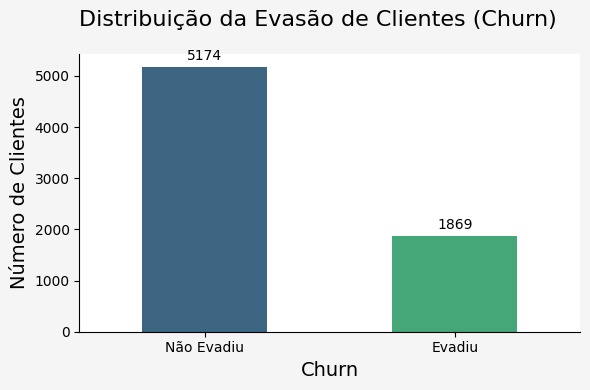

Cerca de **26.54% dos clientes evadiram**, o que representa um desafio considerável para a empresa.

#### **Churn por Variáveis Categóricas**

A análise por categorias destacou algumas características de clientes mais propensos à evasão:

* **Idoso**: Clientes idosos têm uma taxa de churn mais alta do que clientes não idosos.

    ```
    Churn por Idoso (Percentual):
    | Idoso | 0     | 1     |
    |:------|:------|:------|
    | 0     | 76.38 | 23.62 |
    | 1     | 58.26 | 41.74 |
    ```
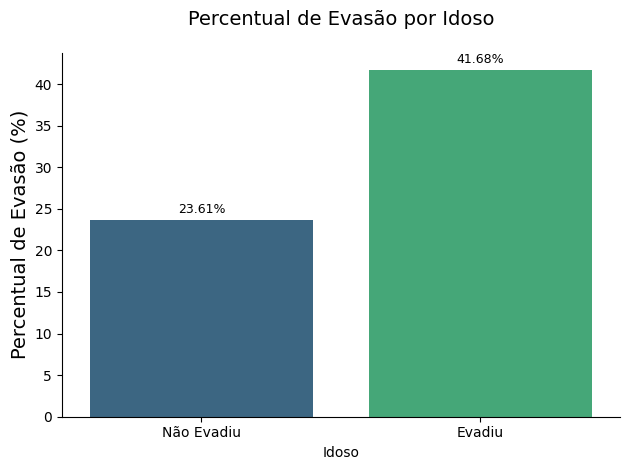



* **Parceiro e Dependentes**: Clientes sem parceiros ou dependentes são mais propensos a evadir.

```
    Churn por Parceiro (Percentual):
    | Parceiro | 0     | 1     |
    |:---------|:------|:------|
    | 0        | 67.04 | 32.96 |
    | 1        | 80.00 | 20.00 |
```

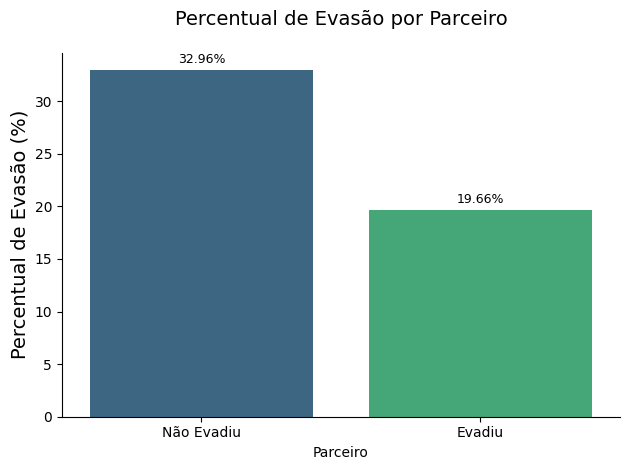


```
    Churn por Dependentes (Percentual):
    | Dependentes | 0     | 1     |
    |:------------|:------|:------|
    | 0           | 68.66 | 31.34 |
    | 1           | 84.54 | 15.46 |
```
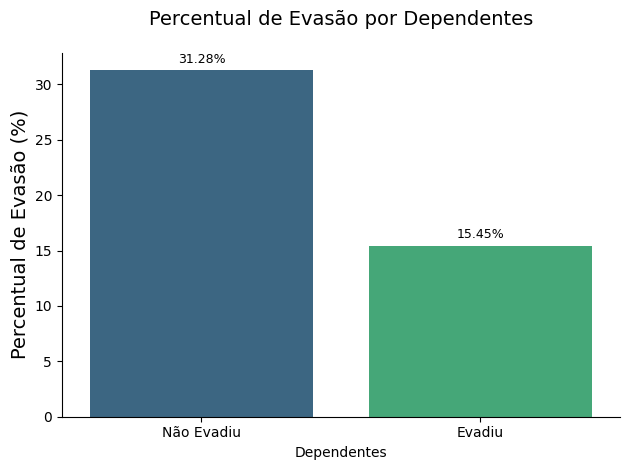

* **Serviço de Internet**: Clientes com serviço de internet de Fibra Óptica apresentam a maior taxa de evasão.

    ```
    Churn por Servico_internet (Percentual):
    | Servico_internet | 0     | 1     |
    |:-----------------|:------|:------|
    | DSL              | 81.04 | 18.96 |
    | Fiber optic      | 58.11 | 41.89 |
    | No               | 92.51 | 7.49  |
    ```

    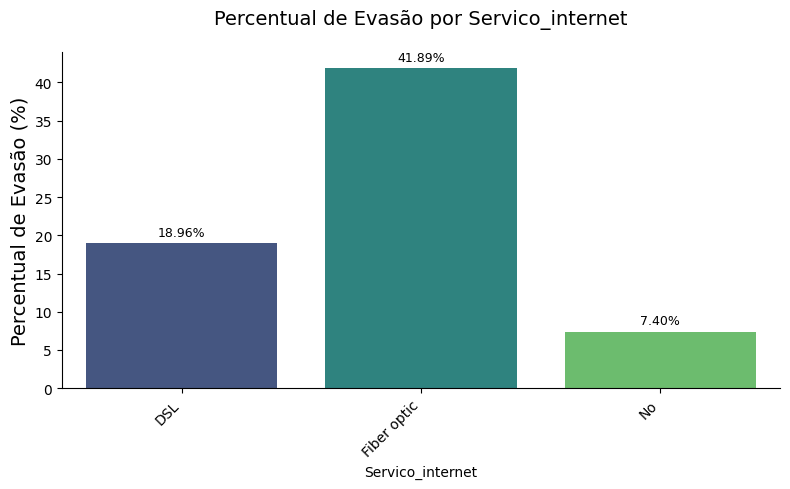

* **Serviços Adicionais (Segurança Online, Backup Online, Suporte Técnico)**: Clientes que não contratam esses serviços adicionais de internet (segurança online, backup online, proteção de dispositivo, suporte técnico) têm uma taxa de churn significativamente maior. Isso sugere que a percepção de valor e a segurança são fatores importantes.

    ```
    Churn por Seguranca_online (Percentual):
    | Seguranca_online | 0     | 1     |
    |:-----------------|:------|:------|
    | 0                | 57.06 | 42.94 |
    | 1                | 84.22 | 15.78 |
    ```
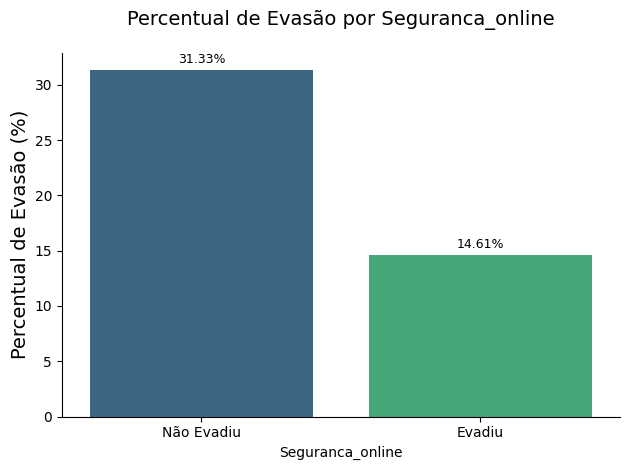


```
Churn por Backup_online (Percentual):
| Backup_online   | 0.0   | 1.0   |
|:----------------|:------|:------|
| 0               | 70.83 | 29.17 |
| 1               | 78.47 | 21.53 |
```

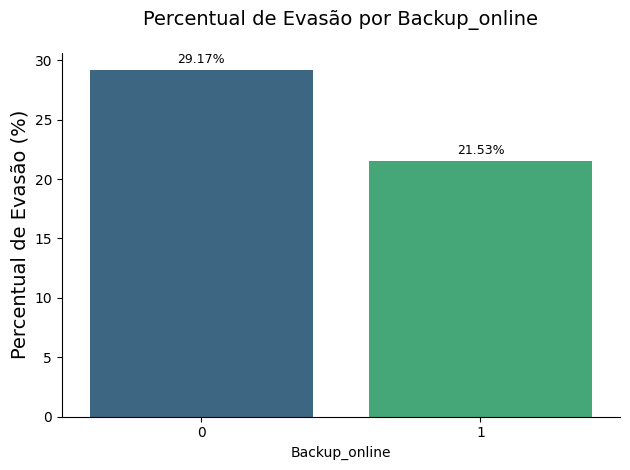

```
Churn por Suporte_tecnico (Percentual):
| Suporte_tecnico   | 0.0   | 1.0   |
|:------------------|:------|:------|
| 0                 | 68.81 | 31.19 |
| 1                 | 84.83 | 15.17 |
```

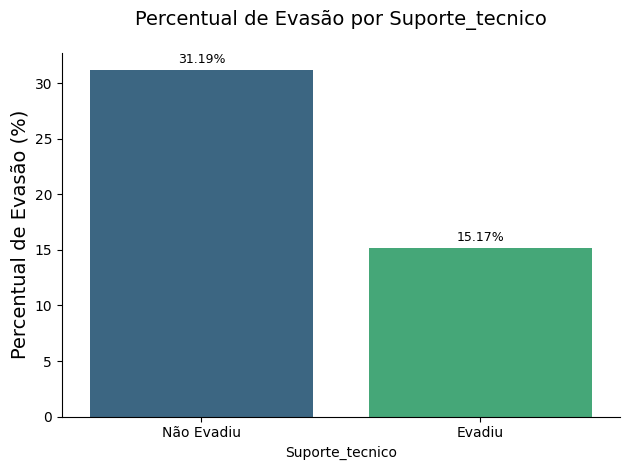

* **Contrato**: Clientes com contratos mensais evadem muito mais do que aqueles com contratos de um ou dois anos.

    ```
    Churn por Contrato (Percentual):
    | Contrato      | 0     | 1     |
    |:--------------|:------|:------|
    | Month-to-month| 56.63 | 43.37 |
    | One year      | 88.74 | 11.26 |
    | Two year      | 97.16 | 2.84  |
    ```
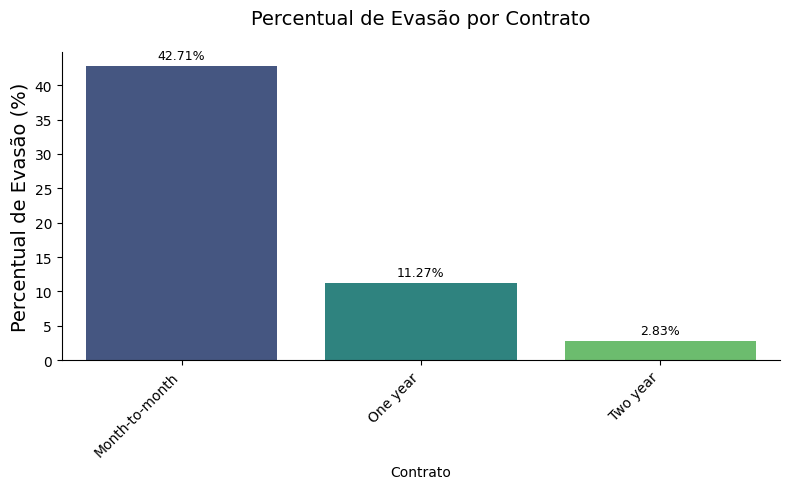


* **Fatura Sem Papel**: Clientes que optam por fatura sem papel (Paperless Billing) apresentam maior taxa de churn.

    ```
    Churn por Fatura_papel (Percentual):
    | Fatura_papel | 0     | 1     |
    |:-------------|:------|:------|
    | 0            | 83.79 | 16.21 |
    | 1            | 66.40 | 33.60 |
    ```
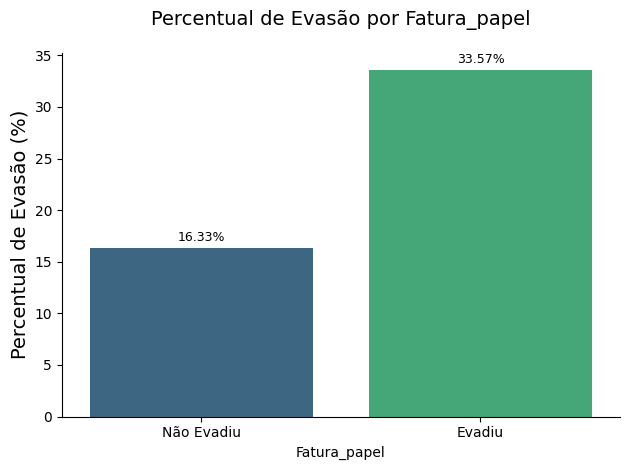

 * **Método de Pagamento**: Clientes que utilizam cheques eletrônicos têm uma taxa de evasão mais elevada.

    ```
    Churn por Metodo_pagamento (Percentual):
    | Metodo_pagamento         | 0     | 1     |
    |:-------------------------|:------|:------|
    | Bank transfer (automatic)| 83.74 | 16.26 |
    | Credit card (automatic)  | 84.71 | 15.29 |
    | Electronic check         | 54.80 | 45.20 |
    | Mailed check             | 80.91 | 19.09 |
    ```
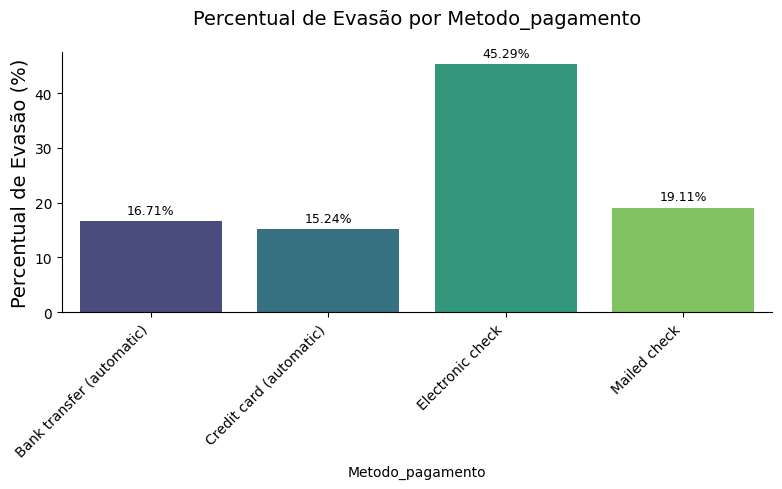

###**Contagem de Evasão por Variáveis Numéricas**
* **Tempo de Serviço**: Clientes com menor tempo de serviço (recém-chegados) são mais propensos a evadir. A densidade de churn é maior para `Tempo_servico` próximo a zero.
* **Taxas Mensais**: Clientes com taxas mensais mais altas (acima de $70,00) mostram uma densidade de churn elevada, sugerindo que o custo pode ser um fator decisivo.
* **Cobrança Total**: Curiosamente, clientes com cobrança total mais baixa (e, portanto, menor tempo de serviço) tendem a evadir.
* **Contas Diárias**: A distribuição das contas diárias mostra que clientes que evadem têm uma média de contas diárias mais alta.

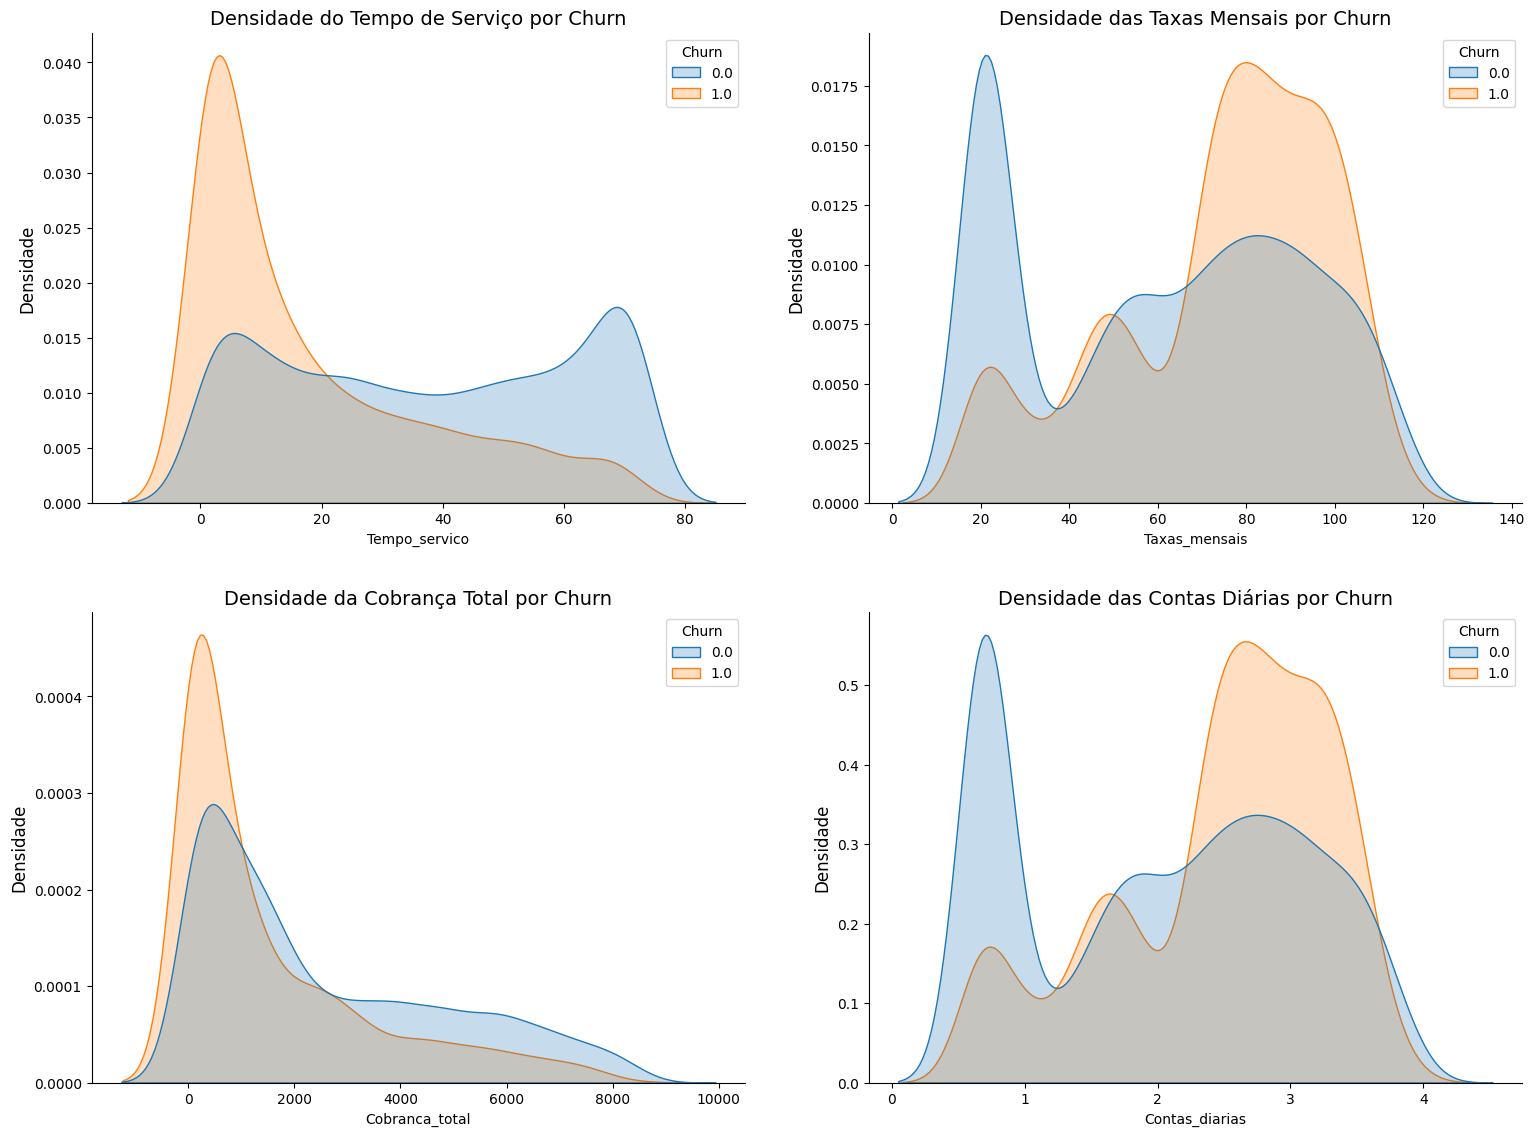

### **Correlação com Churn**

A matriz de correlação e a correlação específica com 'Churn' destacam os principais drivers de evasão:

Correlação da variável 'Churn' com outras variáveis (top 10):

```
Variável	                     Correlação
Contrato_Month-to-month	      0.41
Servico_internet_Fiber optic	 0.31
Taxas_mensais	                0.19
Fatura_papel	                 0.19
Idoso	                        0.15
Streaming_TV	                 0.06
Streaming_filmes	             0.06
Varias_linhas	                0.04
Servico_telefone	             0.01
Sexo	                         0.01
```

Correlação da variável 'Churn' com outras variáveis (bottom 10):

```
Variável	             Correlação
Protecao_dispositivo	 -0.18
Backup_online	        -0.19
Servico_internet_No	  -0.23
Dependentes	          -0.23
Parceiro	             -0.23
Suporte_tecnico	      -0.29
Seguranca_online	     -0.30
Cobranca_total	       -0.30
Contrato_Two year	    -0.30
Tempo_servico	        -0.35
```

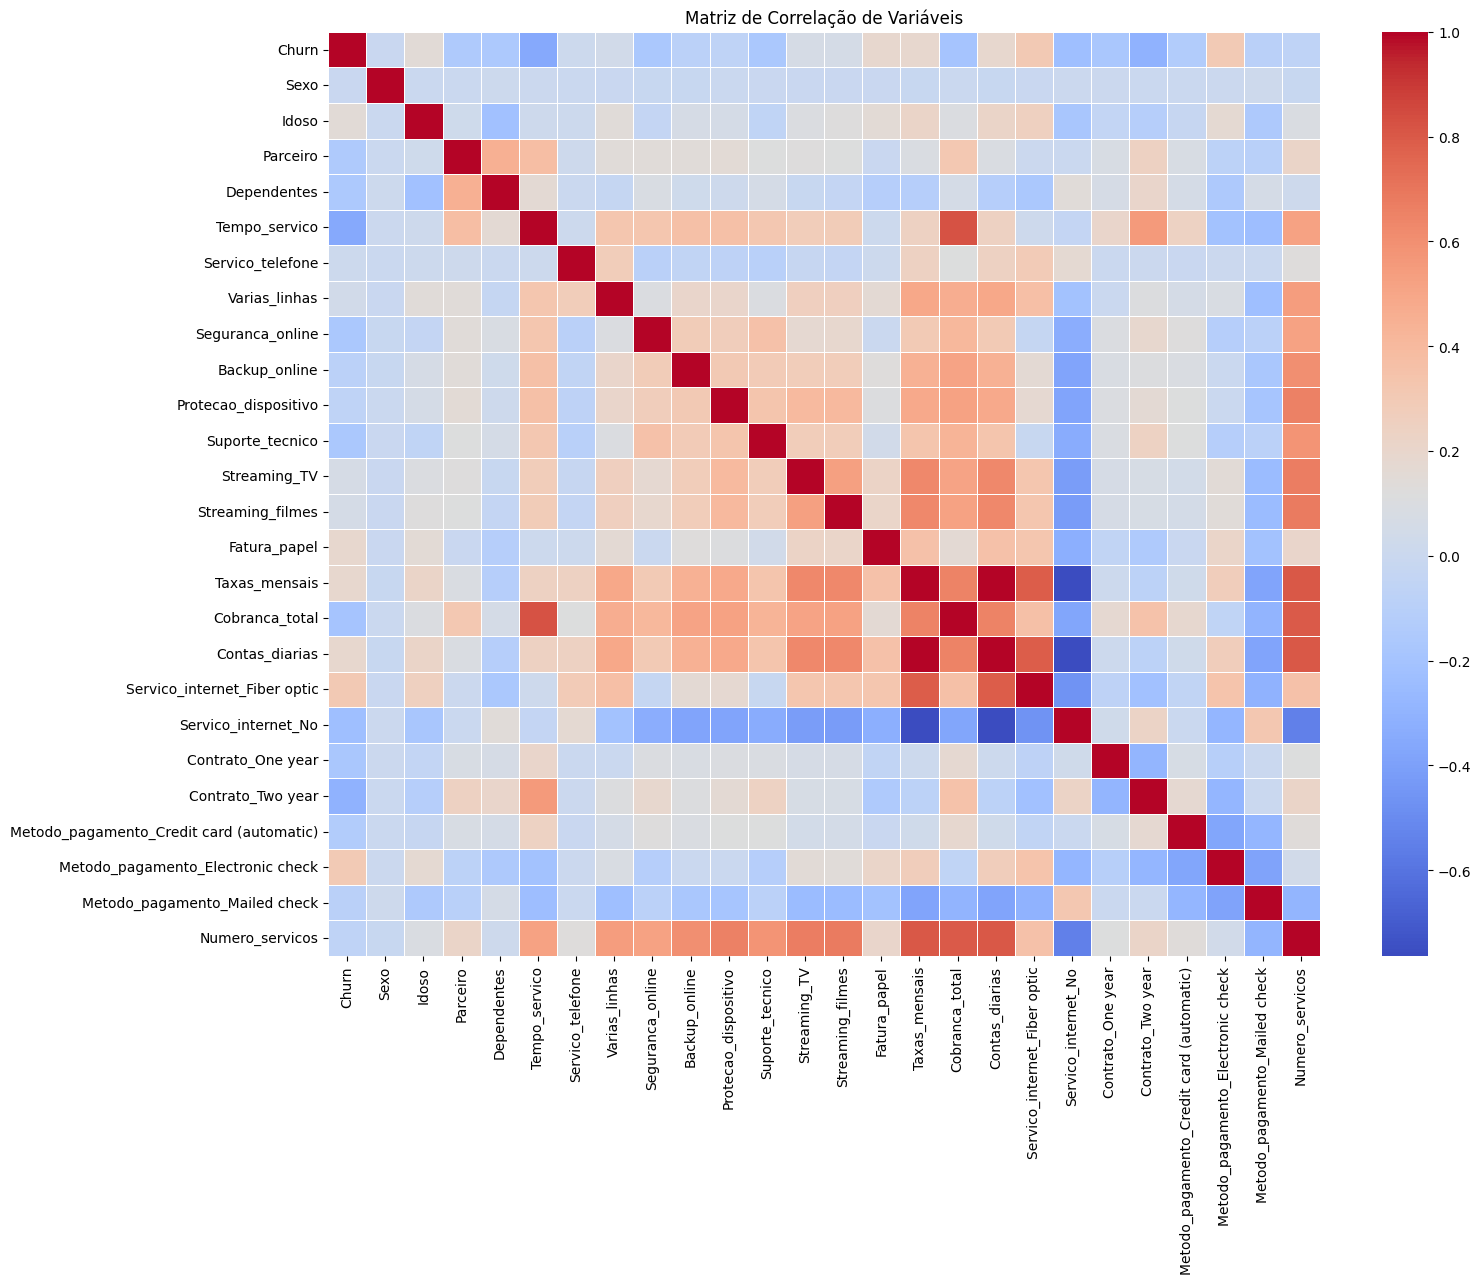

* **Correlações Positivas (Aumentam o Churn)**:
    * `Contrato_Month-to-month (contrato mensal)`: É a variável com maior correlação positiva, reforçando que contratos flexíveis resultam em maior churn.
    * `Servico_internet_Fiber optic`: Clientes com fibra óptica são mais propensos à evasão.
    * `Taxas_mensais` e `Fatura_papel`: Taxas mensais elevadas e a opção por fatura sem papel também estão associadas a maior churn.
    * `Idoso`: Idosos são mais propensos à evasão.

* **Correlações Negativas (Diminuem o Churn)**:
    * `Tempo_servico`: Quanto maior o tempo de serviço, menor a probabilidade de churn.
    * `Contrato_Two year` e `Cobranca_total`: Contratos de longo prazo e maior cobrança total (que indica maior tempo de serviço e/ou mais serviços) estão negativamente correlacionados com churn.
    * `Seguranca_online`, `Suporte_tecnico`, `Backup_online`, `Protecao_dispositivo`: A presença desses serviços adicionais de internet está fortemente correlacionada com menor churn, indicando que eles agregam valor percebido e contribuem para a retenção.
    * `Parceiro` e `Dependentes`: Clientes com parceiros e dependentes são menos propensos a evadir.


**Contas Diárias**


Clientes que evadem geralmente apresentam contas diárias mais elevadas, como pode ser visto na distribuição do boxplot.

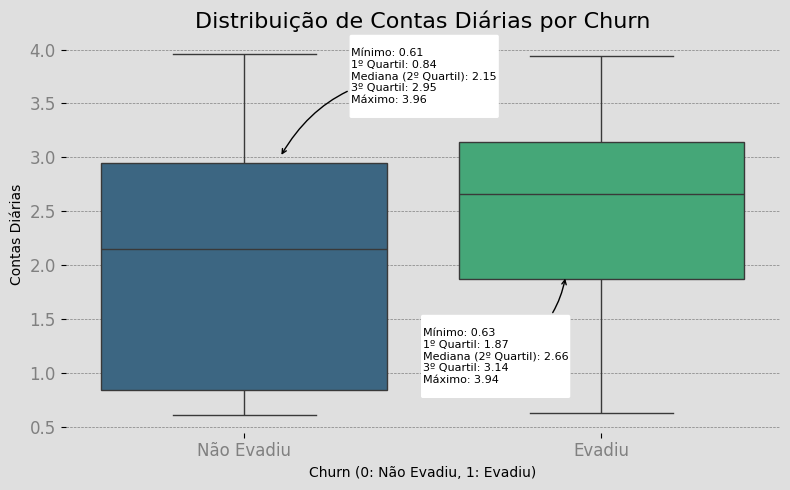


**Análise do Gráfico:**

A mediana de "Contas Diárias" para clientes que evadiram (2.66) é um pouco maior do que para clientes que não evadiram (2.15). Isso sugere que, em média, clientes que evadiram tinham um número ligeiramente maior de contas diárias.

Amplitude Interquartil (IQR - Largura da Caixa): A caixa "Não Evadiu" (2.95 - 0.84 = 2.11) é um pouco mais larga do que a caixa "Evadiu" (3.14 - 1.87 = 1.27). Isso indica que a variabilidade nas contas diárias é um pouco maior para clientes que não evadiram, enquanto para os que evadiram, as contas diárias tendem a ser mais concentradas em torno da mediana.

Os valores mínimos e máximos são bastante semelhantes para ambas as categorias, sugerindo que ambas as categorias têm clientes com poucas e muitas contas diárias.

O gráfico mostra que, embora haja sobreposição nas distribuições, os clientes que evadiram tendem a ter um número um pouco maior de contas diárias em comparação com os clientes que não evadiram, e a distribuição das contas diárias para clientes que evadiram é mais concentrada.


**Número de Serviços Contratados**

A análise do percentual de churn por número de serviços contratados mostra uma clara tendência: **quanto mais serviços o cliente possui, menor a probabilidade de ele evadir**. Clientes com 7 ou 8 serviços adicionais têm taxas de churn significativamente mais baixas **(12.41%, 5.29% respectivamente)** em comparação com aqueles que têm poucos ou nenhum serviço adicional.

```
Percentual de Churn por Número de Serviços Contratados:
| Numero_servicos   | Churn   |
|:------------------|:--------|
| 0                 | 43.75   |
| 1                 | 21.11   |
| 2                 | 32.83   |
| 3                 | 36.48   |
| 4                 | 31.34   |
| 5                 | 25.55   |
| 6                 | 22.49   |
| 7                 | 12.41   |
| 8                 | 5.29    |
```
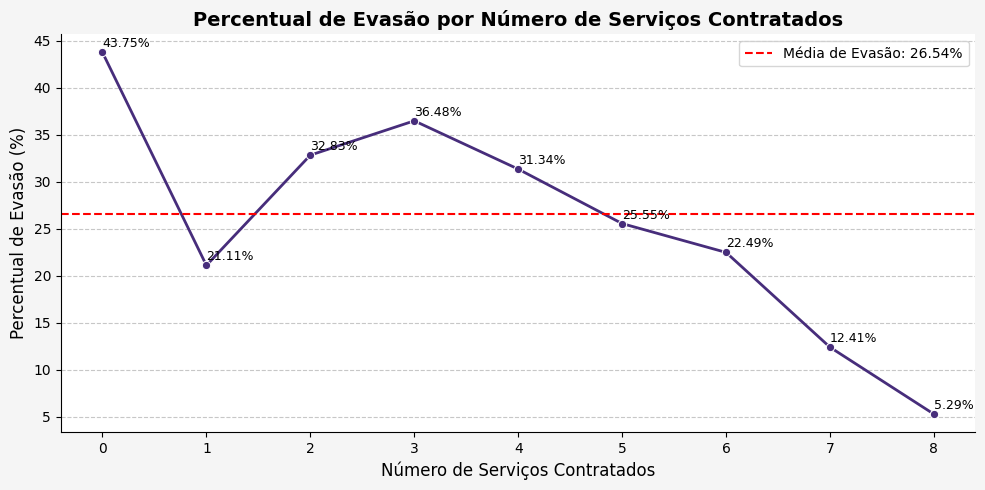



---

###**Justificativa e Recomendação:**

### **Conclusões e Insights**

Os principais achados desta análise são:

* **Clientes de alto risco**: Clientes com **contrato mensal**, utilizando **fibra óptica**, com **taxas mensais elevadas**, que optam por **fatura sem papel**, e que usam **cheque eletrônico** como método de pagamento, são os mais propensos a evadir.
* **Recém-chegados**: Clientes com **pouco tempo de serviço** são vulneráveis à evasão.
* **Serviços de Valor Agregado**: A ausência de serviços adicionais como **segurança online, backup online, proteção de dispositivo e suporte técnico** está fortemente ligada a maiores taxas de churn. Estes serviços parecem criar uma "cola" com o cliente.
* **Demografia**: **Idosos** e clientes **sem parceiros ou dependentes** também apresentam maior taxa de churn.
* **Custo percebido**: A cobrança total mais baixa para clientes que evadem, junto com o maior valor das contas diárias e taxas mensais elevadas, sugere que a percepção de um custo alto em relação ao benefício pode ser um gatilho para a evasão.

Esses dados fornecem uma base sólida para a TelecomX entender quem está evadindo e por quê. Ao focar nesses grupos de risco e nas características que os tornam vulneráveis, a empresa pode desenvolver estratégias de retenção mais eficazes.


---


### **Recomendações**

Com base nas conclusões, as seguintes recomendações são propostas para a TelecomX reduzir a evasão de clientes:

1.  **Incentivar Contratos de Longo Prazo**:
    * Oferecer descontos significativos ou benefícios exclusivos para clientes que optarem por contratos de um ou dois anos. Isso pode ser crucial para reter clientes que atualmente utilizam planos mensais.
    * Comunicar claramente as vantagens e a economia a longo prazo dos contratos mais longos.

2.  **Melhorar a Experiência da Fibra Óptica**:
    * Investigar as causas da alta evasão entre clientes de fibra óptica. Pode ser relacionado à qualidade do serviço, suporte técnico, ou expectativas não atendidas.
    * Realizar pesquisas de satisfação específicas para este segmento e implementar melhorias direcionadas.

3.  **Promover Serviços Adicionais de Valor Agregado**:
    * Educar os clientes sobre os benefícios de serviços como segurança online, backup, proteção de dispositivo e suporte técnico.
    * Oferecer pacotes promocionais ou períodos de teste gratuitos para esses serviços, especialmente para novos clientes ou aqueles em risco de evasão. Isso pode aumentar a percepção de valor e dificultar a mudança para um concorrente.

4.  **Estratégias de Retenção para Novos Clientes**:
    * Implementar um programa de "boas-vindas" robusto para novos clientes, com acompanhamento proativo e suporte personalizado nos primeiros meses.
    * Oferecer benefícios exclusivos ou um "período de carência" para experimentar todos os serviços sem compromisso inicial.

5.  **Atenção aos Métodos de Pagamento e Fatura**:
    * Investigar por que clientes que usam cheque eletrônico evadem mais. Pode haver problemas de usabilidade ou percepção de segurança.
    * Para clientes que optam por fatura sem papel, garantir que a comunicação digital seja clara, personalizada e ofereça fácil acesso a informações e suporte.

6.  **Programas de Fidelidade para Clientes Idosos e Solteiros**:
    * Desenvolver ofertas e canais de comunicação adaptados às necessidades de clientes idosos e àqueles sem parceiros ou dependentes.
    * Considerar programas de fidelidade ou benefícios que valorizem a permanência e a construção de um relacionamento duradouro com a empresa.

7.  **Análise de Preços e Concorrência**:
    * Monitorar as taxas mensais e as "contas diárias" percebidas pelos clientes em relação à concorrência.
    * Realizar ajustes de preços ou oferecer pacotes mais flexíveis para permanecer competitivo e garantir que os clientes sintam que estão recebendo um bom valor pelo dinheiro.

Ao implementar essas recomendações, a TelecomX poderá não apenas mitigar a evasão de clientes, mas também construir relacionamentos mais sólidos e duradouros com sua base de clientes.

**Autor:** Angelo Carvalho

Para dúvidas ou sugestões:

[LinkedIn](https://www.linkedin.com/in/angelomoises)